# SHILPA J SHETTY
# TASK 1
# Prediction using Supervised ML
# 

# Linear Regression with Python Scikit Learn
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.



# Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading data into dataframe

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [4]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
data.shape

(25, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<AxesSubplot:>

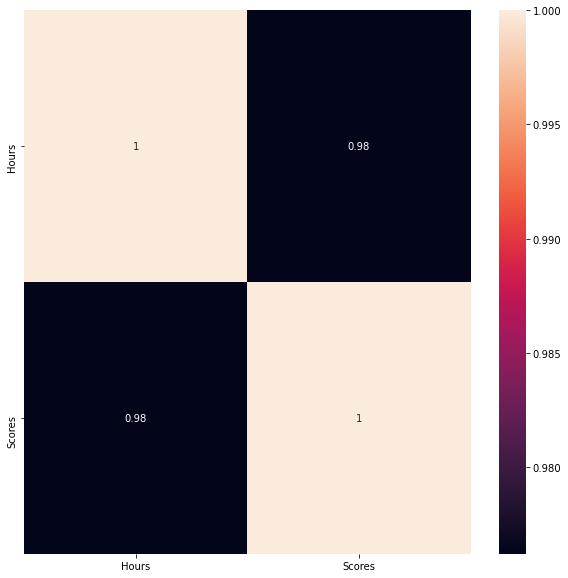

In [7]:
corr=data.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot = True, ax=ax)

# As you can see both scores and hours of study are highly positively correlated

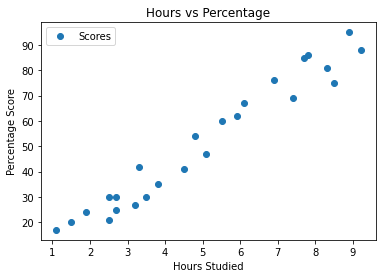

In [9]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# creating feature x and target y for linear regression

In [10]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [11]:
X.shape, Y.shape, data.shape

((25, 1), (25,), (25, 2))

# splitting into test and train sets

In [15]:
from sklearn.model_selection import train_test_split

In [24]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

# Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()

In [27]:
model.fit(Xtrain, Ytrain)

LinearRegression()

In [28]:
model.coef_

array([9.91065648])

In [29]:
model.intercept_

2.0181600414346974

In [30]:
model.coef_.dot(Xtest[4, :]) + model.intercept_ 

60.49103327722388

In [32]:
model.predict(Xtest[4, :].reshape(1, -1))

array([60.49103328])

# Plotting the regression line

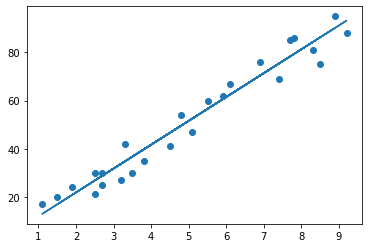

In [33]:
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

# Now we are all set to make predictions

In [36]:
print(Xtest) # Testing data - In Hours
ypred = model.predict(Xtest) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Comparing Actual vs Predicted

In [37]:
df = pd.DataFrame({'Actual': Ytest, 'Predicted': ypred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Now let's check with our own data

In [48]:
hour1 = np.array([8.25, 9.4, 5.8, 3.5]).reshape(-1, 1)
own_pred = model.predict(hour1)


In [49]:
print("No of Hours = {}".format(hour1))
print("Predicted Score = {}".format(own_pred))

No of Hours = [[8.25]
 [9.4 ]
 [5.8 ]
 [3.5 ]]
Predicted Score = [83.78107601 95.17833096 59.49996763 36.70545772]


# Evaluating the model 

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [51]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Ytest, ypred))

Mean Absolute Error: 4.183859899002975


# plotting the difference

In [53]:
df1 = pd.DataFrame(Ytest)
df2 = pd.DataFrame(ypred)

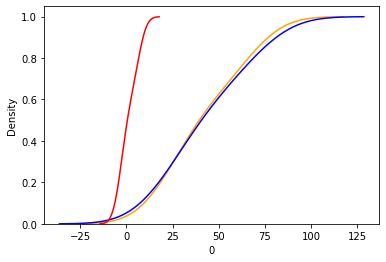

In [54]:
fix, ax = plt.subplots()
sns.kdeplot(df1[0], cumulative=True, color='orange', label='arr1')
sns.kdeplot(df2[0], cumulative=True, color='b', label='arr2')
sns.kdeplot(df2[0]-df1[0], cumulative=True, color='r', label='difference')
plt.show()

Our model is doing pretty well